# RED for Jmeter results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# READ CSV FILES

In [2]:
csv_file_path_jtl = '/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data/baseline/ar.jtl'

## raw_data

In [3]:
# Read the CSV file
df_raw = pd.read_csv(csv_file_path_jtl)

In [4]:
df_raw

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1716030270808,71,GET_mainPage,200,OK,Thread Group - baseline 1-3,text,True,NaN,114,0,10,10,NaN,40,0,1
1,1716030270784,97,GET_mainPage,200,OK,Thread Group - baseline 1-1,text,True,NaN,114,0,10,10,NaN,34,0,1
2,1716030270797,99,GET_mainPage,200,OK,Thread Group - baseline 1-2,text,True,NaN,114,0,11,11,NaN,18,0,2
3,1716030270818,78,GET_mainPage,200,OK,Thread Group - baseline 1-4,text,True,NaN,114,0,11,11,NaN,22,0,5
4,1716030270826,91,GET_mainPage,200,OK,Thread Group - baseline 1-5,text,True,NaN,114,0,14,14,NaN,48,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1716030316686,98,POST_card,200,OK,Thread Group - baseline 1-89,text,True,NaN,114,0,3,3,NaN,2,0,3
49996,1716030316715,78,POST_confirm,200,OK,Thread Group - baseline 1-86,text,True,NaN,114,0,3,3,NaN,9,0,5
49997,1716030316771,101,POST_card,200,OK,Thread Group - baseline 1-97,text,True,NaN,114,0,2,2,NaN,35,0,3
49998,1716030316784,97,POST_confirm,200,OK,Thread Group - baseline 1-89,text,True,NaN,114,0,2,2,NaN,44,0,1


In [5]:
df_raw['timeStamp'] = pd.to_datetime(df_raw['timeStamp'], unit='ms')
# Replace NaN values with 0
df_raw.fillna(0, inplace=True)

In [7]:
# Group by sampleLabel
grouped = df_raw.groupby('label')

# Prepare to store RED metrics for each sampleLabel
red_metrics = {}

In [9]:
for label, group in grouped:
    group = group.copy()
    group.set_index('timeStamp', inplace=True)
    
    # Calculate Rate (requests per second)
    rate_df = group.resample('S').size()
    
    # Calculate Error rate (errors per second)
    error_df = group[group['success'] == False].resample('S').size()
    # If error_df is empty, fill it with zeros with the same index as rate_df
    if error_df.empty:
        error_df = pd.Series(0, index=rate_df.index)
    else:
        error_df = error_df.reindex(rate_df.index, fill_value=0)
    
    # Calculate Duration (average response time)
    duration_df = group.resample('S')['elapsed'].mean()
    # Replace NaNs with 0
    rate_df.fillna(0, inplace=True)
    error_df.fillna(0, inplace=True)
    duration_df.fillna(0, inplace=True)
    
    # Store RED metrics
    red_metrics[label] = {
        'rate': rate_df,
        'error_rate': error_df,
        'duration': duration_df,
        'avg_rate': rate_df.mean(),
        'avg_error_rate': error_df.mean(),
        'avg_response_time': duration_df.mean()
    }
# Display RED metrics summary for each sampleLabel
for label, metrics in red_metrics.items():
    print(f"SampleLabel: {label}")
    print(f"  Rate: {metrics['avg_rate']:.2f} requests/second")
    print(f"  Error Rate: {metrics['avg_error_rate']:.2f} errors/second")
    print(f"  Average Duration: {metrics['avg_response_time']:.2f} milliseconds")
    print()

SampleLabel: GET_card
  Rate: 212.77 requests/second
  Error Rate: 0.00 errors/second
  Average Duration: 78.35 milliseconds

SampleLabel: GET_category
  Rate: 212.77 requests/second
  Error Rate: 0.00 errors/second
  Average Duration: 77.94 milliseconds

SampleLabel: GET_mainPage
  Rate: 212.77 requests/second
  Error Rate: 0.00 errors/second
  Average Duration: 78.50 milliseconds

SampleLabel: POST_card
  Rate: 217.39 requests/second
  Error Rate: 0.00 errors/second
  Average Duration: 78.38 milliseconds

SampleLabel: POST_confirm
  Rate: 217.39 requests/second
  Error Rate: 0.00 errors/second
  Average Duration: 128.09 milliseconds



# Plot Aggragated grafs

In [11]:
red_metrics.items()

dict_items([('GET_card', {'rate': timeStamp
2024-05-18 11:04:30      7
2024-05-18 11:04:31    173
2024-05-18 11:04:32    228
2024-05-18 11:04:33    222
2024-05-18 11:04:34    219
2024-05-18 11:04:35    225
2024-05-18 11:04:36    233
2024-05-18 11:04:37    230
2024-05-18 11:04:38    223
2024-05-18 11:04:39    227
2024-05-18 11:04:40    234
2024-05-18 11:04:41    222
2024-05-18 11:04:42    228
2024-05-18 11:04:43    221
2024-05-18 11:04:44    223
2024-05-18 11:04:45    230
2024-05-18 11:04:46    226
2024-05-18 11:04:47    230
2024-05-18 11:04:48    224
2024-05-18 11:04:49    224
2024-05-18 11:04:50    228
2024-05-18 11:04:51    230
2024-05-18 11:04:52    226
2024-05-18 11:04:53    224
2024-05-18 11:04:54    235
2024-05-18 11:04:55    216
2024-05-18 11:04:56    235
2024-05-18 11:04:57    225
2024-05-18 11:04:58    221
2024-05-18 11:04:59    224
2024-05-18 11:05:00    234
2024-05-18 11:05:01    219
2024-05-18 11:05:02    226
2024-05-18 11:05:03    226
2024-05-18 11:05:04    227
2024-05-18 

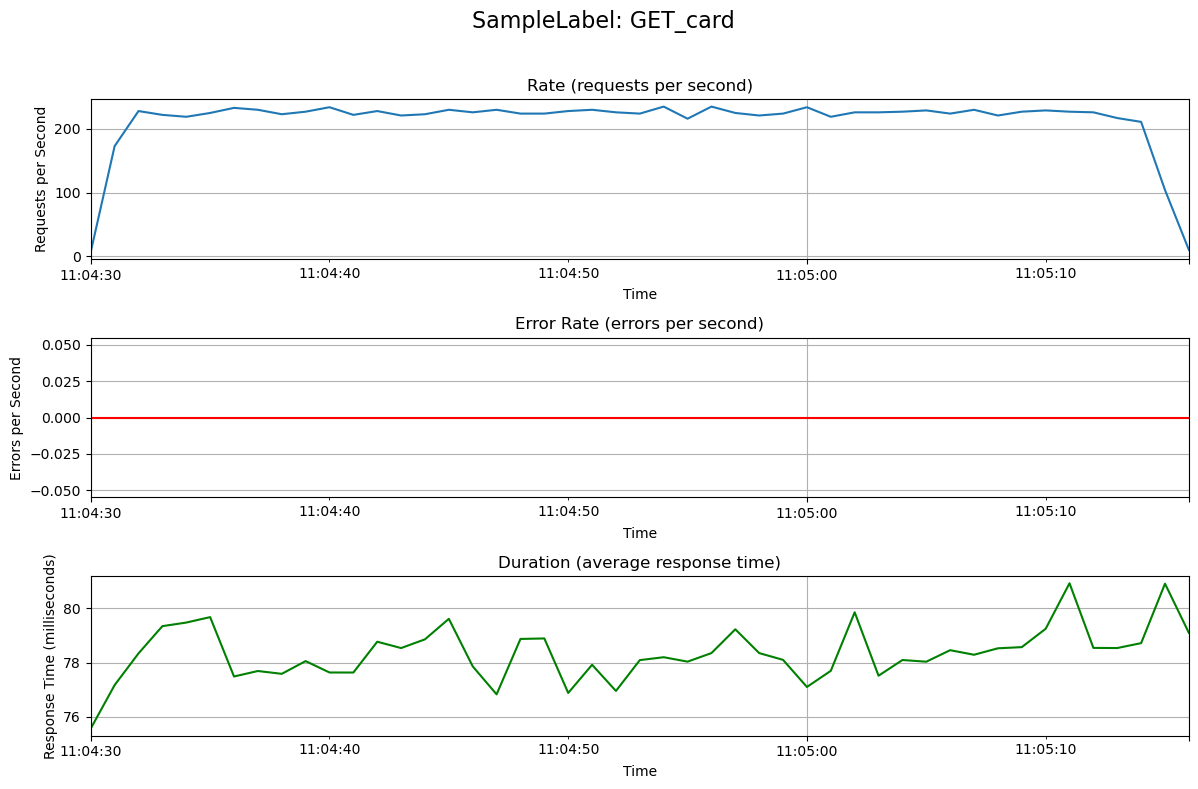

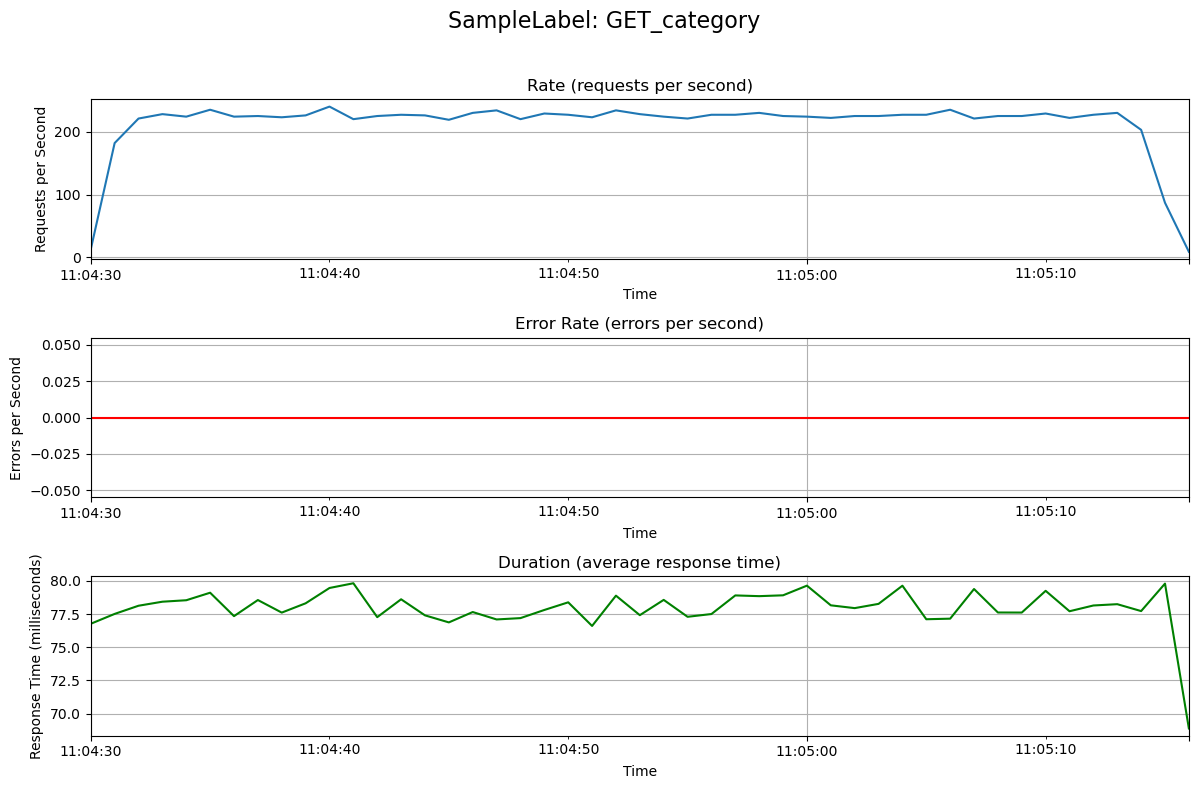

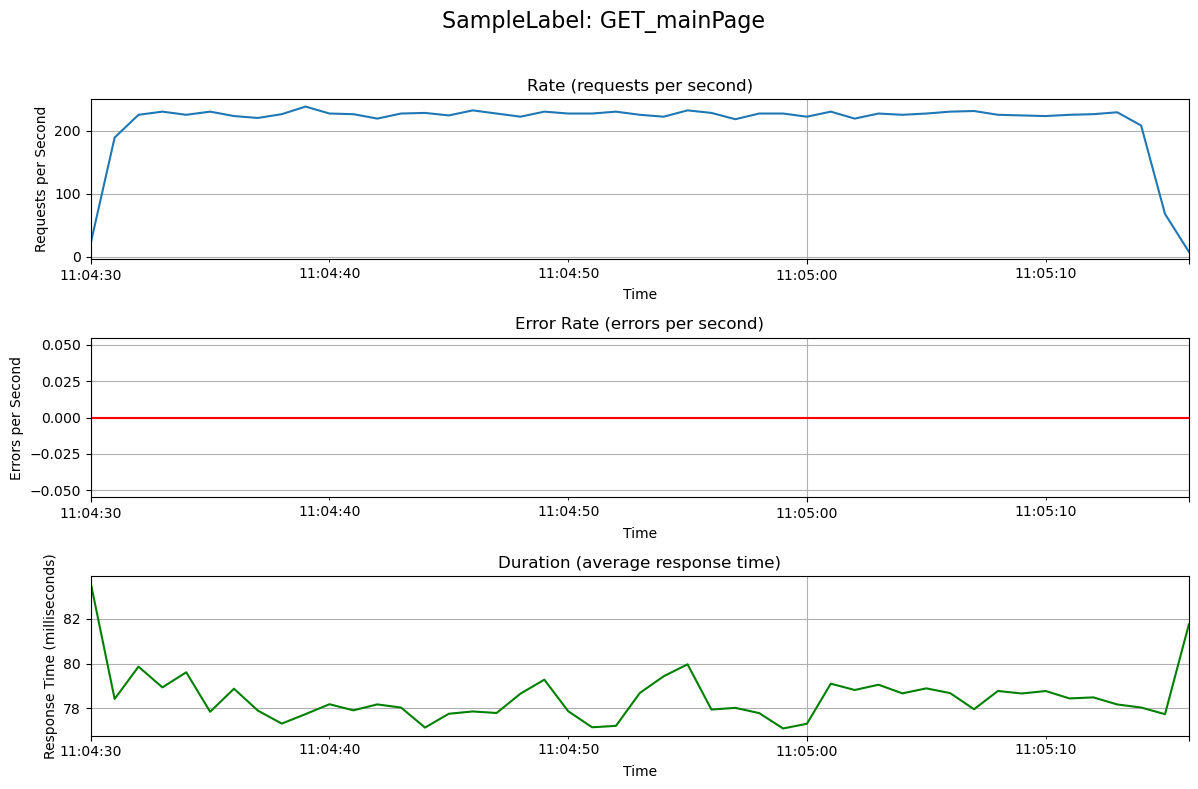

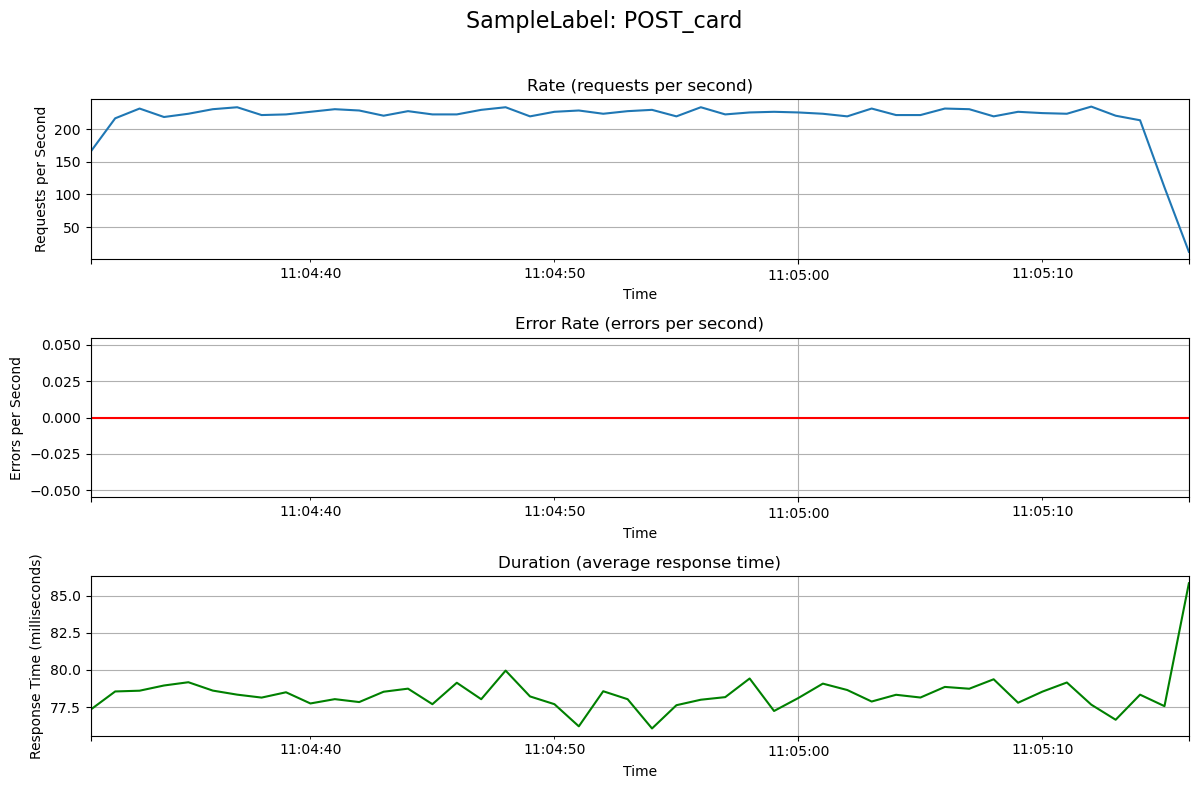

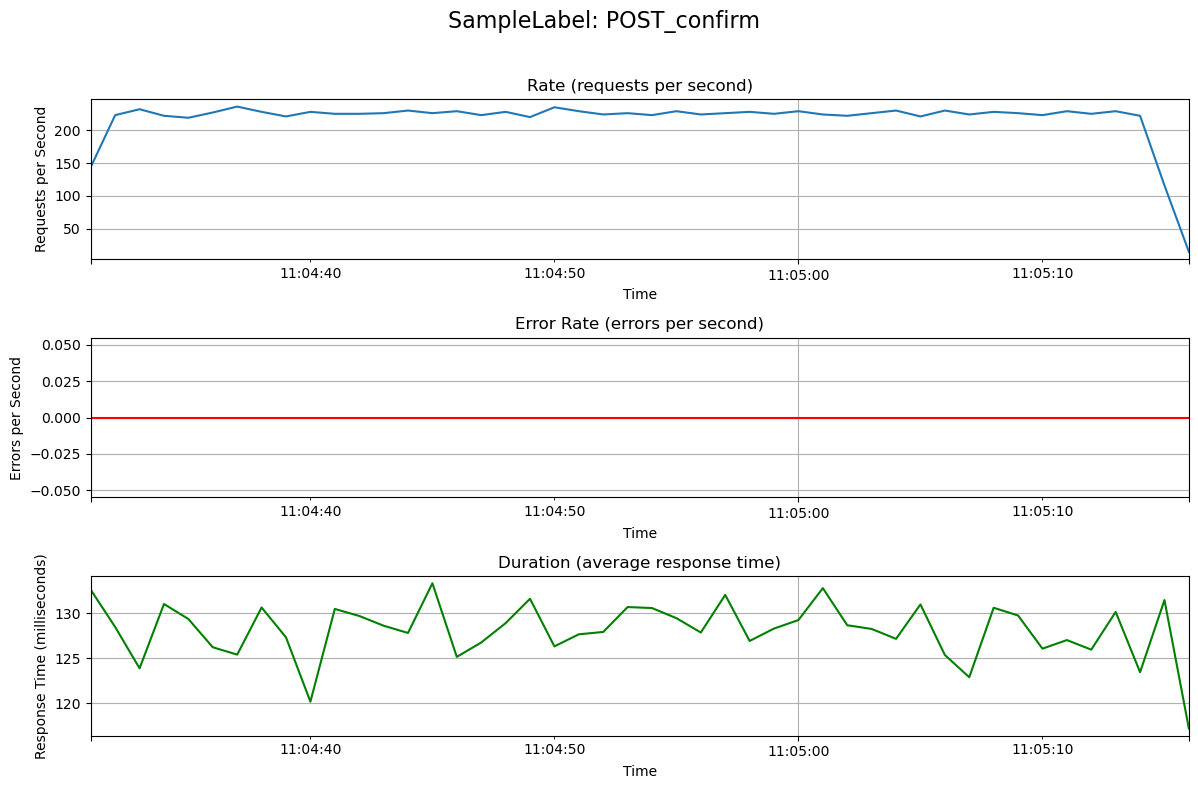

In [13]:
# Plotting the results for each sampleLabel
for label, metrics in red_metrics.items():
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'SampleLabel: {label}', fontsize=16)
    
    # Plot Rate
    plt.subplot(3, 1, 1)
    metrics['rate'].plot(title='Rate (requests per second)', ylabel='Requests per Second', xlabel='Time')
    plt.grid(True)
    
    # Plot Error Rate
    plt.subplot(3, 1, 2)
    metrics['error_rate'].plot(title='Error Rate (errors per second)', ylabel='Errors per Second', xlabel='Time', color='red')
    plt.grid(True)
    
    # Plot Duration
    plt.subplot(3, 1, 3)
    metrics['duration'].plot(title='Duration (average response time)', ylabel='Response Time (milliseconds)', xlabel='Time', color='green')
    plt.grid(True)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    plt.savefig(f'/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data/{label}_RED.png',facecolor='white', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
    
    # Show plot
    plt.show()
    
